In [1]:
DRUG_1 = "MILADEMETAN (BRD:BRD-K00003406-001-01-9)"
DRUG_2 = "IDASANUTLIN (BRD:BRD-K62627508-001-01-5)"
DRUG_3 = "SAR405838 (BRD:BRD-A16035238-001-01-7)"
DRUG_4 = "CGM097 (BRD:BRD-K79584249-001-01-3)"
DRUG_5 = "AMG-232 (BRD:BRD-K64925568-001-01-8)"
DRUG_6 = "RG7112 (BRD:BRD-A78210457-001-01-5)"
TARGET_DRUG = DRUG_1

In [2]:
%pip install tensorflow keras numpy pandas scikit-learn matplotlib seaborn gdown
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 252.5 MB 3.1 MB/s eta 0:00:011
     |████████████████████████████████| 1.3 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 3.4 MB/s eta 0:00:01    |████████████████████████████▏   | 10.0 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 464 kB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 6.9 MB/s eta 0:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     |████████████████████████████████| 417 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 858 kB/s eta 0:00:011
     |████████████████████████████████| 11.3 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 

/Users/efraimshine/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
from urls import download_url, PRISM_DRUG_REPURPOSING, DEPMAP_MUTATION_DATA

lof_path = download_url(DEPMAP_MUTATION_DATA)
prism_path = download_url(PRISM_DRUG_REPURPOSING)

lof_df = pd.read_csv(lof_path)
prism_df = pd.read_csv(prism_path)

Downloading...
From (original): https://drive.google.com/uc?id=1iedYFEZoDZxIrBZys8LXAmzD79DMIKsA
From (redirected): https://drive.google.com/uc?id=1iedYFEZoDZxIrBZys8LXAmzD79DMIKsA&confirm=t&uuid=997fa6c8-4591-4d3a-9346-8d6fc383a3ce
To: /Users/efraimshine/workspace/bioinformatics_analysis/data/26a6842aa339d25d5e14e8ed8c24683c.csv
100%|██████████| 148M/148M [00:18<00:00, 8.03MB/s] 


Downloading...
From: https://drive.google.com/uc?id=1DcvKjdJlKE6zy1vHdw-8iHPn3cxF_QvY
To: /Users/efraimshine/workspace/bioinformatics_analysis/data/550cdc5a977b8a5c9501d02e0bf57c09.csv
100%|██████████| 72.1M/72.1M [00:08<00:00, 8.15MB/s]


In [4]:
lof_df = lof_df.rename(columns={'Unnamed: 0': 'cell_line'})
lof_df

,cell_line,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
0,ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACH-001949,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACH-000402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ACH-000930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,ACH-001093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1925,ACH-000083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,ACH-000134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1927,ACH-000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
prism_df = prism_df.rename(columns={'Unnamed: 0': 'cell_line'})
prism_df

,cell_line,ARV-825 (BRD:BRD-A00047421-001-01-7),RS-0481 (BRD:BRD-A00055058-001-01-0),8-BROMO-CGMP (BRD:BRD-A00077618-236-07-6),DOCUSATE (BRD:BRD-A00092689-236-04-9),NIFURTIMOX (BRD:BRD-A00100033-001-08-9),BALAGLITAZONE (BRD:BRD-A00147595-001-01-5),FLUTRIMAZOLE (BRD:BRD-A00218260-001-03-4),KBG (BRD:BRD-A00376169-001-01-6),OTENZEPAD (BRD:BRD-A00520476-001-07-4),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000001,-1.207281,0.515743,-0.015577,-0.395123,-0.449332,0.489379,0.206675,0.27273,0.021036,...,-0.856546,0.266364,-0.435815,-0.148373,-0.308255,0.125641,-0.067407,0.448387,-0.194616,-0.200107
1,ACH-000002,-4.231563,NaN,NaN,-0.538376,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.535864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACH-000004,-3.860672,NaN,NaN,0.306971,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.787437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACH-000005,-2.271411,NaN,NaN,0.035096,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.180988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACH-000006,0.277833,NaN,NaN,-0.124899,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.651824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,ACH-002039,-2.314389,NaN,NaN,0.202935,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.295103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,ACH-002041,-2.805922,NaN,NaN,-0.335913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.343104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,ACH-002042,-2.332483,NaN,NaN,-0.334916,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.886113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,ACH-002046,-3.441262,NaN,NaN,-0.343913,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.508481,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cell_lines = prism_df['cell_line'].tolist()
len(cell_lines)

914

In [7]:
# Get the intersection of cell lines from both tables
available_cell_lines = list(set(cell_lines) & set(lof_df['cell_line'].tolist()))
len(available_cell_lines)

908

In [8]:
lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]



# Merge the dataframes
merged_df = pd.merge(lof_df, prism_df, on='cell_line', how='inner')
merged_df


,cell_line,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),...,TALC (BRD:BRD-M92352362-002-02-3),EFONIDIPINE-MONOETHANOLATE (BRD:BRD-M92675308-003-07-1),LASOFOXIFENE (BRD:BRD-M93148412-001-02-6),DICHLOROACETATE (BRD:BRD-M97302542-001-03-6),CEVIMELINE (BRD:BRD-M98279124-300-01-1),COLESEVALAM (BRD:BRD-U08520523-000-01-0),TYLOXAPOL (BRD:BRD-U25960968-000-01-9),SEVELAMER (BRD:BRD-U45393375-000-01-6),TYLOXAPOL (BRD:BRD-U48018661-000-01-9),PHOSPHATIDYLCHOLINE (BRD:BRD-U51753822-000-01-1)
0,ACH-000062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.593092,0.155420,-0.110680,0.066653,0.376504,-0.667170,0.339993,-0.784645,0.196559,-0.122816
1,ACH-000693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.089930,-0.282444,NaN,0.034446,-0.413644,-0.558715,NaN,0.109949,-0.218330
2,ACH-000956,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.096350,-0.213070,0.102351,-0.112367,0.431514,0.087069,-0.106955,0.072231,-0.277884,-1.272322
3,ACH-000776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-0.272577,-0.718362,NaN,0.231423,-0.685261,-0.383972,0.318919,0.064086,0.033310
4,ACH-000882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.170471,0.448463,-0.414354,-0.510164,0.129040,-0.317851,-0.042478,0.376372,-0.002272,0.463181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,ACH-000289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.210997,-0.258038,-2.560795,-0.292041,0.019278,-0.428988,-0.140898,NaN,-0.871838,-0.474771
904,ACH-000172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.464047,0.410463,-0.225154,-0.243637,0.454367,0.358763,-0.520311,0.005926,0.021185,-0.059934
905,ACH-000613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.476331,-0.125093,-0.638420,-1.322733,-1.082759,-0.404719,-0.119925,0.442954,0.010060,0.369898
906,ACH-000357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,-0.686232,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
lof_df = lof_df[lof_df['cell_line'].isin(available_cell_lines)]
prism_df = prism_df[prism_df['cell_line'].isin(available_cell_lines)]
prism_df_target_drug = prism_df[['cell_line', TARGET_DRUG]]



# Merge the dataframes
merged_df = pd.merge(lof_df, prism_df_target_drug, on='cell_line', how='inner')
merged_df = merged_df.dropna(subset=[TARGET_DRUG])

# Separate features and target
#X = merged_df.drop(columns=['DepMap_ID', TARGET_DRUG])
y = merged_df[TARGET_DRUG]
x = merged_df.drop(columns=['cell_line', TARGET_DRUG])


In [10]:
y

0     -0.222744
1     -0.874951
2     -1.500992
3     -2.798681
4     -0.422026
         ...   
903   -7.124000
904   -2.344386
905    0.322975
906   -0.189746
907    0.003478
Name: MILADEMETAN (BRD:BRD-K00003406-001-01-9), Length: 885, dtype: float64

In [11]:
x

,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),RNF223 (401934),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

# Assume 'x' are your features and 'y' are your labels

# Define the desired proportions
test_prop = 0.20  # Proportion for the final test set
val_prop = 0.20   # Proportion for the final validation set
train_prop = 1.0 - test_prop - val_prop # Proportion for the training set (calculated)

# --- Step 1: Split into Training and Temporary (Validation + Test) ---
# We need a temporary set size that covers both validation and test proportions
temp_size = val_prop + test_prop # This will be 0.20 + 0.20 = 0.40

X_train, X_temp, y_train, y_temp = train_test_split(
    x, y,
    test_size=temp_size,       # Reserve 40% for temp (validation + test)
    random_state=42,
)

# --- Step 2: Split Temporary into Validation and Test ---
# We need to calculate the test set size relative to the *temporary* set size.
# test_size_relative = test_prop / temp_size
# In this case: 0.20 / 0.40 = 0.50 (50% of the temporary set becomes the test set)
test_size_relative = test_prop / temp_size

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=test_size_relative, # Split temp 50/50 (since val_prop = test_prop)
    random_state=42,              # Use the same random_state for reproducibility
)

# --- Verification (Optional) ---
print(f"Original data shapes: x={x.shape}, y={y.shape}")
print(f"Training set shapes: X_train={X_train.shape}, y_train={y_train.shape} ({train_prop*100:.0f}%)")
print(f"Validation set shapes: X_val={X_val.shape}, y_val={y_val.shape} ({val_prop*100:.0f}%)")
print(f"Test set shapes: X_test={X_test.shape}, y_test={y_test.shape} ({test_prop*100:.0f}%)")

# Now you have:
# X_train, y_train (60% of original data)
# X_val, y_val     (20% of original data)
# X_test, y_test   (20% of original data)

Original data shapes: x=(885, 19097), y=(885,)
Training set shapes: X_train=(531, 19097), y_train=(531,) (60%)
Validation set shapes: X_val=(177, 19097), y_val=(177,) (20%)
Test set shapes: X_test=(177, 19097), y_test=(177,) (20%)


In [16]:
input_shape = X_train.shape[1]


In [17]:
input_shape

19097

In [18]:
y_range = y.max() - y.min()
y_range

np.float64(9.90254098917069)

In [19]:
X_val

,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),RNF223 (401934),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
509,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_test

,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),RNF223 (401934),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_train

,FAM87B (400728),LINC01128 (643837),SAMD11 (148398),NOC2L (26155),KLHL17 (339451),PERM1 (84808),HES4 (57801),ISG15 (9636),AGRN (375790),RNF223 (401934),...,OR7L1P (Unknown),MIR503HG (Unknown),TM9SF5P (Unknown),TRMT1P1 (Unknown),RPS4Y1 (6192),CHEK2P1 (Unknown),ARSDP1 (Unknown),ANOS2P (Unknown),TTTY13 (83868),TPTE2P4 (Unknown)
105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
random_forest_model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=42)
random_forest_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished


RandomForestRegressor(n_jobs=-1, random_state=42, verbose=1)

In [23]:
feature_importances = zip(X_train.columns, random_forest_model.feature_importances_)

# Sort the features by their importance scores in descending order
sorted_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the sorted features
for name, score in sorted_features:
    print(f"{name}: {score:.4f}")

TP53 (7157): 0.3685
FCGBP (8857): 0.0213
LRP1B (53353): 0.0131
ARID2 (196528): 0.0127
OTOF (9381): 0.0084
RINT1 (60561): 0.0072
GRID2 (2895): 0.0060
ADAMTSL2 (9719): 0.0059
PITRM1 (10531): 0.0055
LRGUK (136332): 0.0053
CACNA1C (775): 0.0048
ADAM29 (11086): 0.0048
INTS6L (203522): 0.0046
SLF2 (55719): 0.0040
SNCAIP (9627): 0.0039
MEN1 (4221): 0.0038
SMAD4 (4089): 0.0037
RIPOR3 (140876): 0.0037
VHL (7428): 0.0035
PTEN (5728): 0.0035
TYRO3 (7301): 0.0034
TMEM245 (23731): 0.0034
IGHV3-72 (Unknown): 0.0034
SULT2A1 (6822): 0.0033
CIITA (4261): 0.0032
ARFGEF3 (57221): 0.0032
RB1 (5925): 0.0032
NF2 (4771): 0.0030
TEP1 (7011): 0.0029
ABCA9 (10350): 0.0029
MMP3 (4314): 0.0029
SMARCB1 (6598): 0.0028
TNRC6B (23112): 0.0027
RNF165 (494470): 0.0027
FSIP1 (161835): 0.0026
ERVW-1 (30816): 0.0026
FKTN (2218): 0.0026
CDKN2A (1029): 0.0026
ZNF664 (144348): 0.0026
ATP8A1 (10396): 0.0025
LRRK2 (120892): 0.0025
FAM205A (259308): 0.0023
MAST2 (23139): 0.0023
SH3BP1 (23616): 0.0023
ZNF850 (342892): 0.0023
ARI

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# param_grid = {
#     #'n_estimators': [50, 100, 200],  # Number of trees
#     #'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
#     #'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
#     #'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
#     'max_features': [1000, 10000, 15000]  # Number of features to consider at each split
# }

# grid_search = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',  # Use RMSE as the scoring metric
#     cv=5,  # 5-fold cross-validation
#     verbose=3,  # Print progress
#     n_jobs=-1  # Use all available CPU cores
# )
# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score (Negative MSE):", grid_search.best_score_)

# best_model = grid_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'max_features': 10000}
Best Score (Negative MSE): -1.7417924120784662


In [30]:
from sklearn.metrics import root_mean_squared_error


random_forest_predictions_training = random_forest_model.predict(X_train)
forest_rmse_training = root_mean_squared_error(y_train, random_forest_predictions_training)
random_forest_predictions_val = random_forest_model.predict(X_val)
forest_rmse_val = root_mean_squared_error(y_val, random_forest_predictions_val)



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
# from sklearn.metrics import root_mean_squared_error


# best_model_predictions_training = best_model.predict(X_train)
# best_model_rmse_training = root_mean_squared_error(y_train, random_forest_predictions_training)
# best_model_predictions_test = best_model.predict(X_val)
# best_model_rmse_test = root_mean_squared_error(y_test, random_forest_predictions_test)

In [31]:
y_std = y.std()
print(f"Standard deviation of target: {y_std}")
print(f"RMSE training: {forest_rmse_training}")
print(f"RMSE test: {forest_rmse_val}")

Standard deviation of target: 1.6793191491070047
RMSE training: 0.5026855920461452
RMSE test: 1.3233904760010573


In [32]:
from sklearn.metrics import mean_squared_error

baseline_prediction = np.full_like(y_val, y_train.mean())
baseline_rmse = root_mean_squared_error(y_val, baseline_prediction)
print(f"Baseline RMSE: {baseline_rmse}")
print(f"Model RMSE training: {forest_rmse_training}")
print(f"Model RMSE val: {forest_rmse_val}")

Baseline RMSE: 1.8580900172007375
Model RMSE training: 0.5026855920461452
Model RMSE val: 1.3233904760010573


In [ ]:
# from sklearn.metrics import mean_squared_error

# baseline_prediction = np.full_like(y_test, y_train.mean())
# baseline_rmse = root_mean_squared_error(y_test, baseline_prediction)
# print(f"Baseline RMSE: {baseline_rmse}")
# print(f"best Model RMSE training: {best_model_rmse_training}")
# print(f"best Model RMSE test: {best_model_rmse_test}")

Baseline RMSE: 1.7869614276035957
best Model RMSE training: 0.48137347157990196
best Model RMSE test: 1.2489519291880098


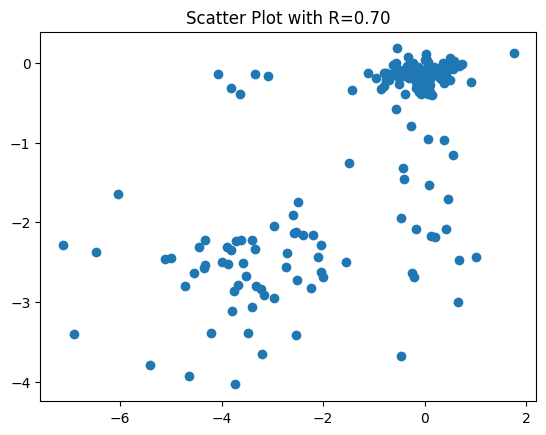

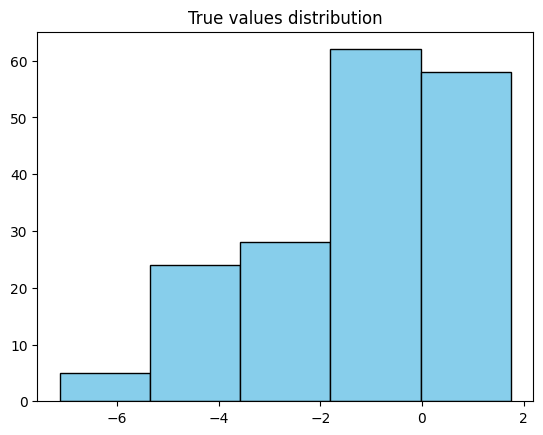

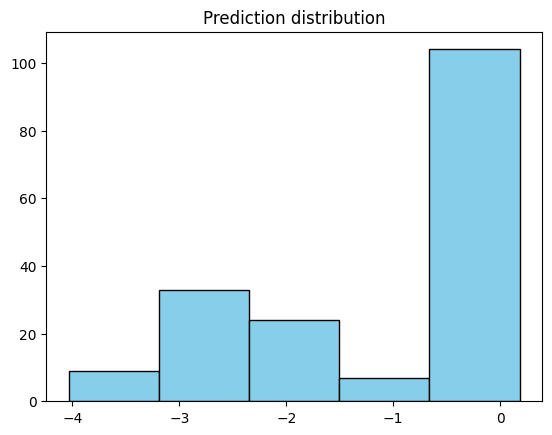

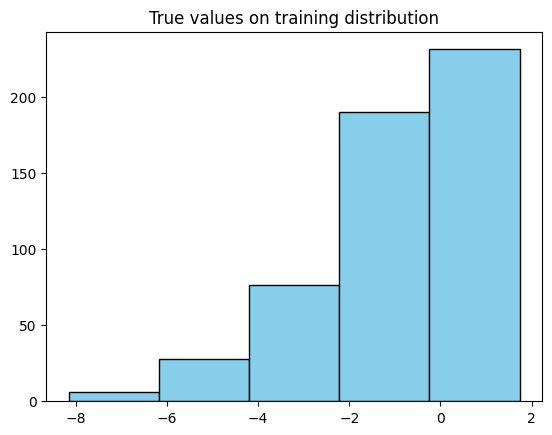

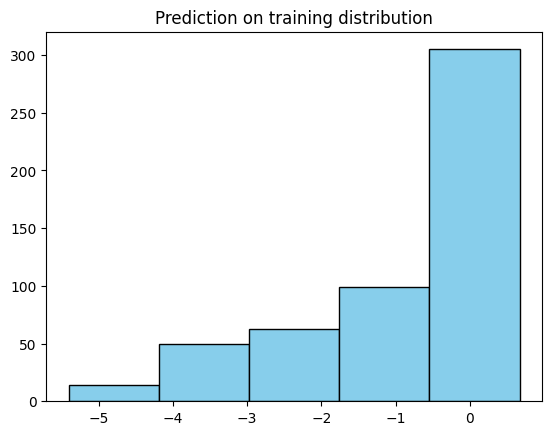

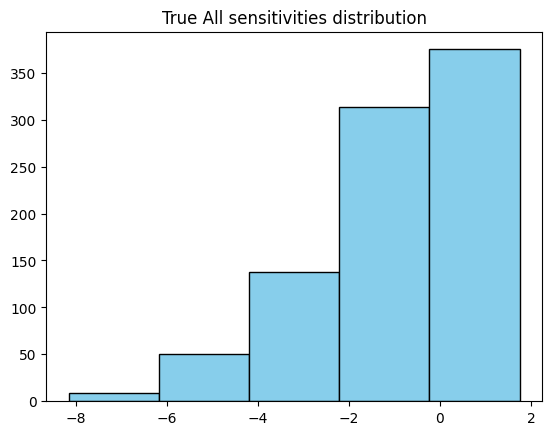

In [35]:
from machine_learning_utils import create_plots_for_model
create_plots_for_model(y_val, y_train, random_forest_predictions_val, random_forest_predictions_training, y)

In [ ]:
model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu', 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu', 
                     kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
        layers.Dropout(0.3),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    loss='mse', 
    metrics=['mae', tf.keras.metrics.R2Score()]
)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'my_model.keras', 
    monitor='val_loss', 
    save_best_only=True
)


: 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold

# K-Fold Cross-Validation
def cross_validate_model(X, y, input_shape, n_splits=5):
    # Convert to numpy arrays to ensure indexing works
    X = np.array(X)
    y = np.array(y)
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    cv_scores = []
    
    for train_index, val_index in kfold.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
                
        history = model.fit(
            X_train, y_train, 
            validation_data=(X_val, y_val),
            epochs=100, 
            batch_size=32, 
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
        
        val_r2 = model.evaluate(X_val, y_val)[2]  # R2 score index
        cv_scores.append(val_r2)
    
    return np.mean(cv_scores), np.std(cv_scores)
mean_cv_score, std_cv_score = cross_validate_model(X_train, y_train, input_shape)
print(f"Cross-Validation R2: {mean_cv_score:.4f} ± {std_cv_score:.4f}")


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 46.5079 - mae: 0.9737 - r2_score: -0.0471 - val_loss: 43.4543 - val_mae: 1.0865 - val_r2_score: -0.2390
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - loss: 42.3844 - mae: 0.9715 - r2_score: -0.0168 - val_loss: 40.1719 - val_mae: 1.1603 - val_r2_score: -0.2314
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 39.1050 - mae: 0.9250 - r2_score: 0.0943 - val_loss: 37.4022 - val_mae: 1.2145 - val_r2_score: -0.3116
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 35.8046 - mae: 0.8198 - r2_score: 0.2256 - val_loss: 34.8253 - val_mae: 1.2617 - val_r2_score: -0.3508
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 33.4731 - mae: 0.8904 - r2_score: 0.1947 - val_loss: 32.5029 - val_mae: 1.3143 - val_r2_score: -0.3999
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - loss: 30.9094 - mae: 0.8484 - r2_score: 0.3121 - val_loss: 30.3803 - val_mae: 1.3246 - val_r2_score: -0.4330
Epoch 7/100
12

In [15]:
X_test_np = np.array(X_test)
y_test_np = np.array(y_test)
model.evaluate(X_test_np, y_test_np)
#print(f"Test Loss: {loss:.4f}")
#print(f"Test MAE: {mae:.4f}")
#print(f"Test r_score: {r_score:.4f}")

NameError: name 'model' is not defined

In [ ]:
predictions = []
for current in X_test:
    reshape_current = current.reshape(1, -1)
    prediction = model.predict(reshape_current)
    predictions.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

In [ ]:
predictions_on_training = []
for current in X_train:
    reshape_current = current.reshape(1, -1)
    prediction = model.predict(reshape_current)
    predictions_on_training.append(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

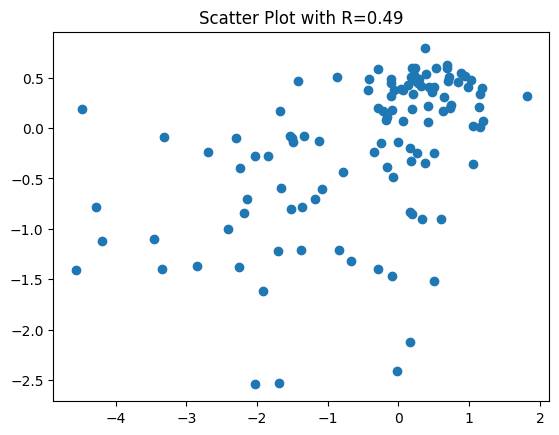

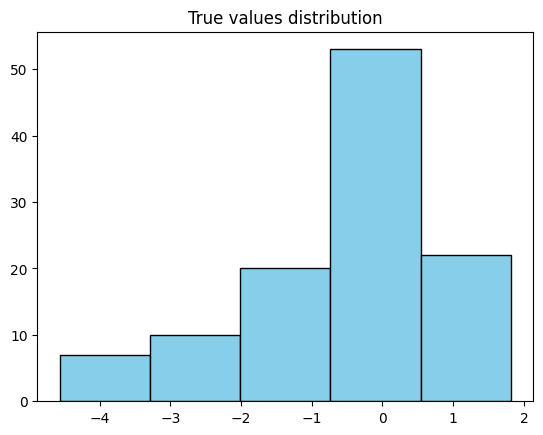

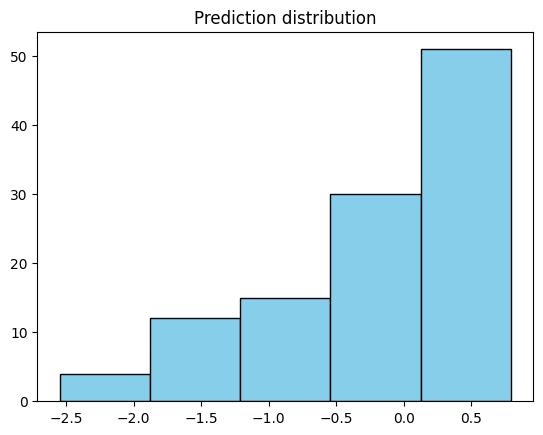

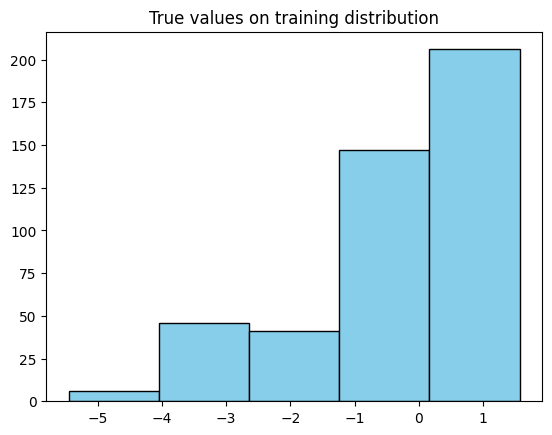

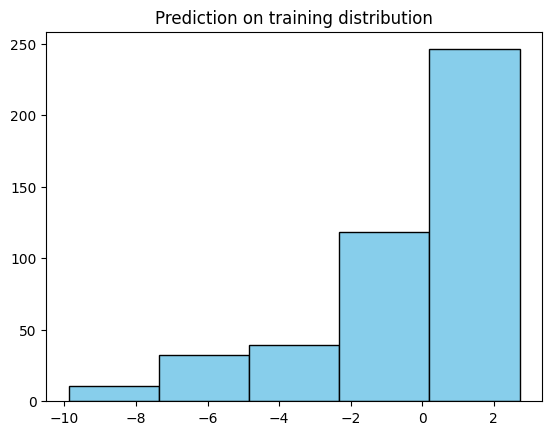

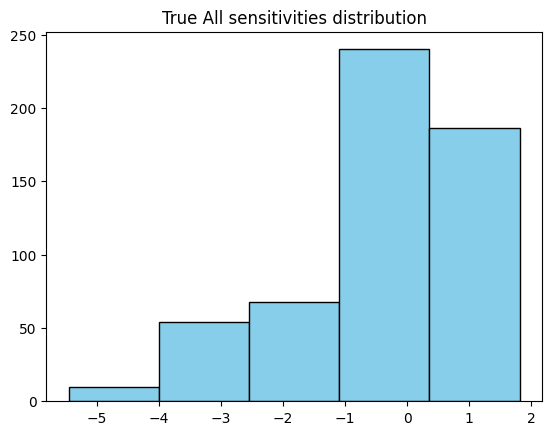

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
predictions_list = [item[0][0] for item in predictions]
predictions_list_divided_by_two = [item[0][0]/2.0 for item in predictions]

prediction_on_training_list = [item[0][0] for item in predictions_on_training]
true_values_list = y_test.tolist()
true_values_list = y_test.tolist()
true_values_on_training_list = y_train.tolist()
all_sensitivities = y.tolist()

r, p_value = pearsonr(true_values_list, predictions_list)
plt.title(f'Scatter Plot with R={r:.2f}')
plt.scatter(true_values_list, predictions_list)
plt.show()


plt.hist(true_values_list, bins=5, color='skyblue', edgecolor='black')
plt.title("True values distribution")
plt.show()

plt.hist(predictions_list, bins=5, color='skyblue', edgecolor='black')
plt.title("Prediction distribution")
plt.show()

plt.hist(true_values_on_training_list, bins=5, color='skyblue', edgecolor='black')
plt.title("True values on training distribution")
plt.show()


plt.hist(prediction_on_training_list, bins=5, color='skyblue', edgecolor='black')
plt.title("Prediction on training distribution")
plt.show()


plt.hist(all_sensitivities, bins=5, color='skyblue', edgecolor='black')
plt.title("True All sensitivities distribution")
plt.show()


In [ ]:
y_train

245    0.728505
115   -0.208413
250    0.416004
193   -0.057232
280    0.317578
         ...   
90     0.094068
135    0.551827
369    0.233304
644    0.776481
131    0.249420
Name: IDASANUTLIN (BRD:BRD-K62627508-001-01-5), Length: 446, dtype: float64

In [ ]:
y_test

203    0.977660
678   -0.179454
66    -0.675540
340    0.068726
89     1.182097
         ...   
11    -0.348301
540    0.607973
22    -0.105515
551   -3.345519
539    0.469041
Name: IDASANUTLIN (BRD:BRD-K62627508-001-01-5), Length: 112, dtype: float64

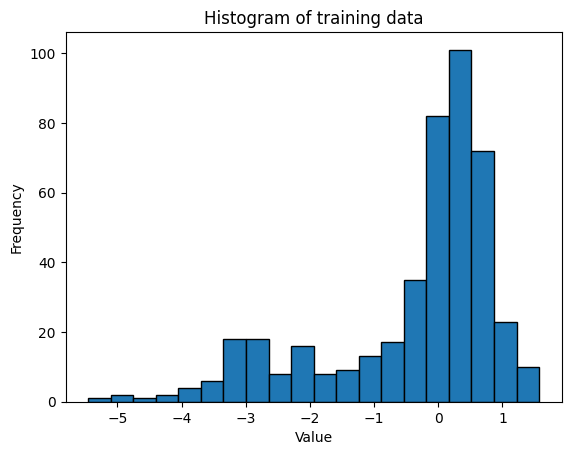

In [ ]:
plt.hist(y_train, bins=20, edgecolor='black')
plt.title('Histogram of training data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


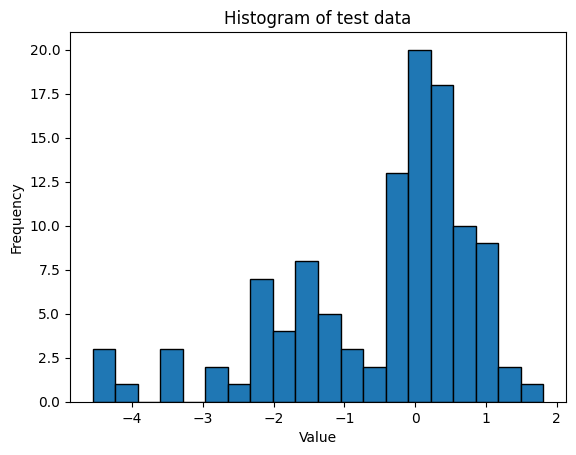

In [ ]:
plt.hist(y_test, bins=20, edgecolor='black')
plt.title('Histogram of test data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
